<a href="https://colab.research.google.com/github/Ishikawa3247/SourceCode/blob/main/scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn 第1回

#決定木

In [ ]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

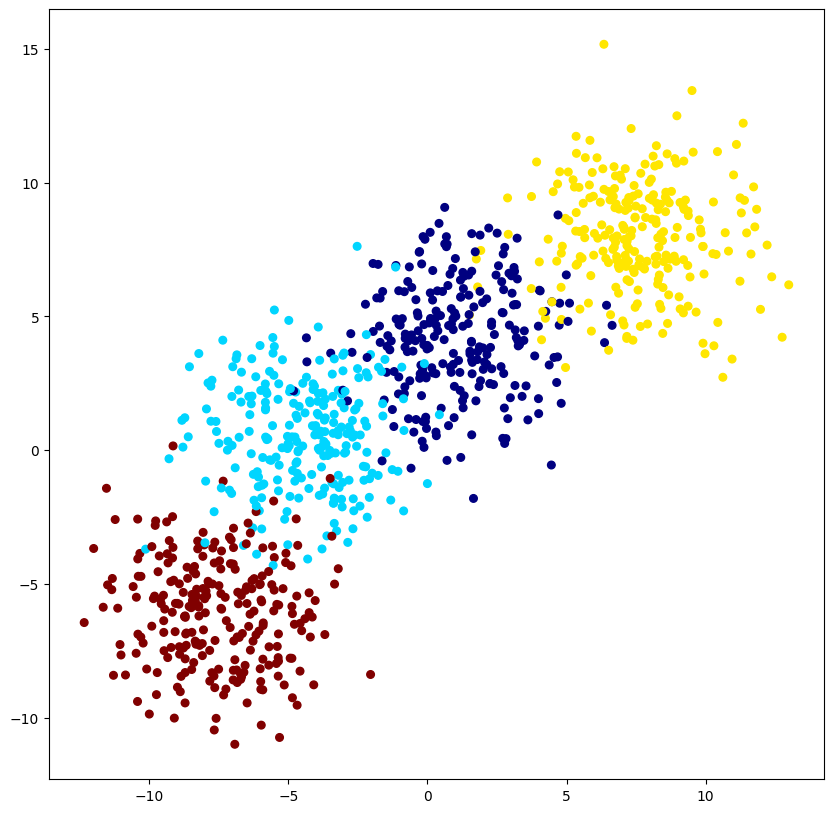

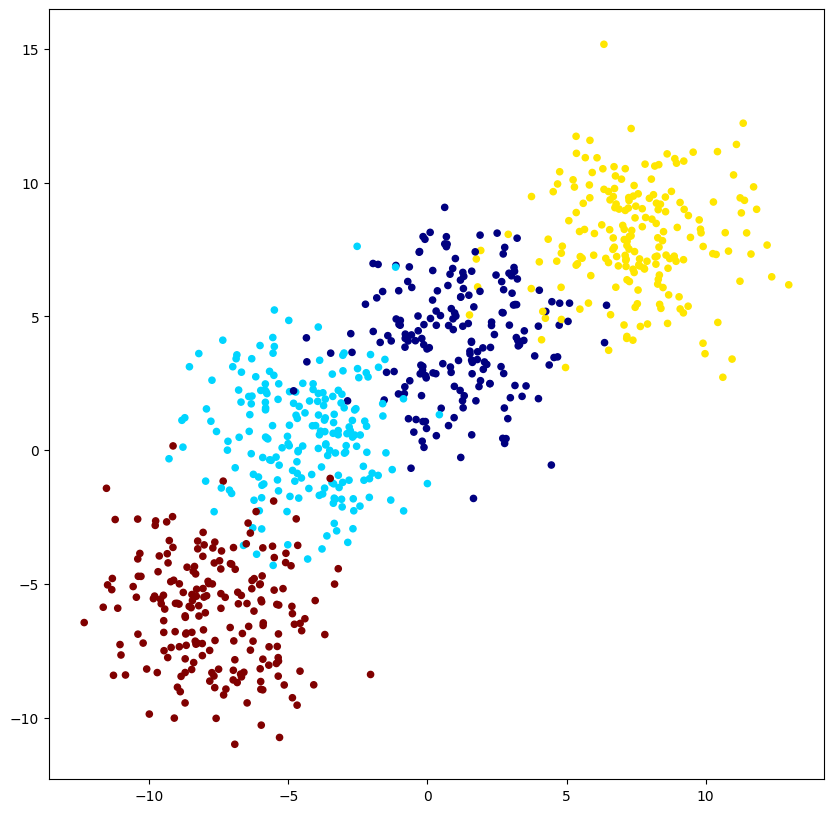

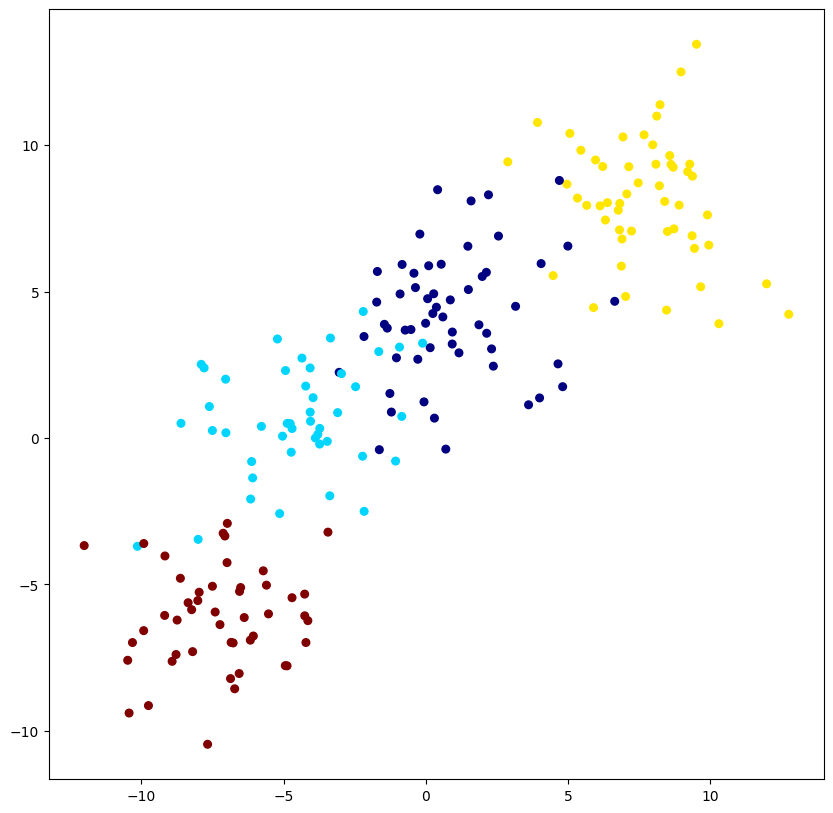

In [ ]:
# データセットの用意(特徴量(属性)は2つ、4クラス)
from sklearn.datasets import make_blobs

# データセットの生成
x, y = make_blobs(n_samples=1000, centers=4,
                  random_state=3, cluster_std=2)

# データセットの描画
plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap='jet')

# データセットの8割を訓練データに設定
x_train, y_train = x[0:799, :], y[0:799]
# 訓練データの描画
plt.figure(figsize=(10,10))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=20, cmap='jet')
# データセットの残り2割をテストデータに設定
x_test, y_test = x[800:999, :], y[800:999]
# テストデータの描画
plt.figure(figsize=(10,10))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=30, cmap='jet')


In [ ]:
# 決定木によるトレーニング
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)


DecisionTreeClassifier(random_state=0)

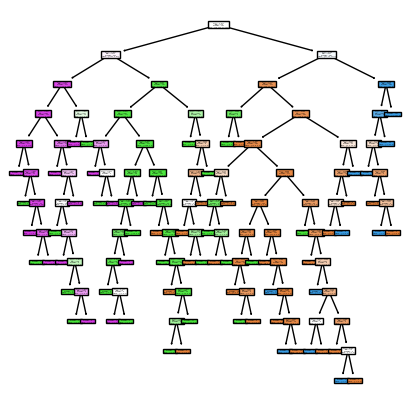

In [ ]:
# 決定木の描画
plt.figure(figsize=(5, 5))
tree.plot_tree(clf, filled=True)
plt.show()

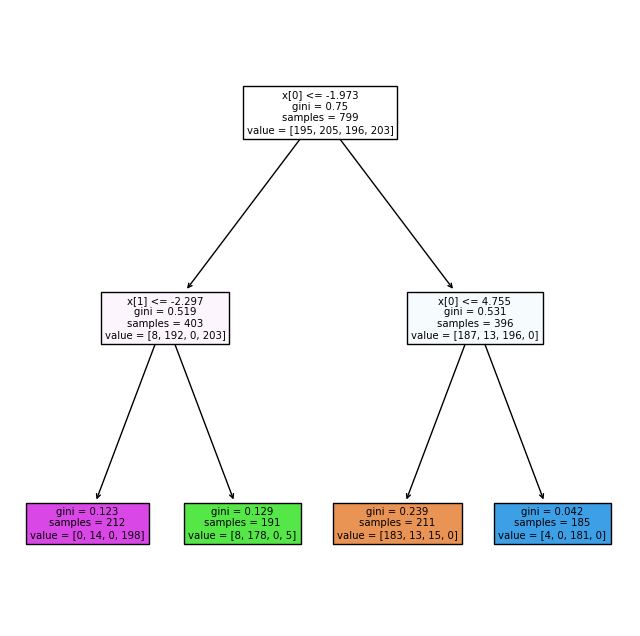

In [ ]:
# 決定木の深さを調整(今回は最大2)
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
# 決定木の描画
plt.figure(figsize=(8, 8))
tree.plot_tree(clf, filled=True)
plt.show()

In [ ]:
# 決定境界描画のための関数（極小な領域は描画出来ない場合がある）
def visualize_border(clf, x, y, dicision_tree=True):

    # 軸の調整
    xlim = (x[:, 0].min() - 0.25, x[:, 0].max() + 0.25)
    ylim = (x[:, 1].min() - 0.25, x[:, 1].max() + 0.25)
    x_min, x_max = xlim
    y_min, y_max = ylim

    # meshgridの作成
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # 分類器の予測をzに保存
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # meshgridを使って、整形します。
    z = z.reshape(xx.shape)

    # 分類ごとに色の付与
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, z, alpha=0.2, cmap='jet')

    # 訓練データの描画
    plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap='jet')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # 境界線の描画
    def plot_boundaries(i, xlim, ylim):
        tree = clf.tree_

        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)

        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])

    if dicision_tree:
      plot_boundaries(0, plt.xlim(), plt.ylim())

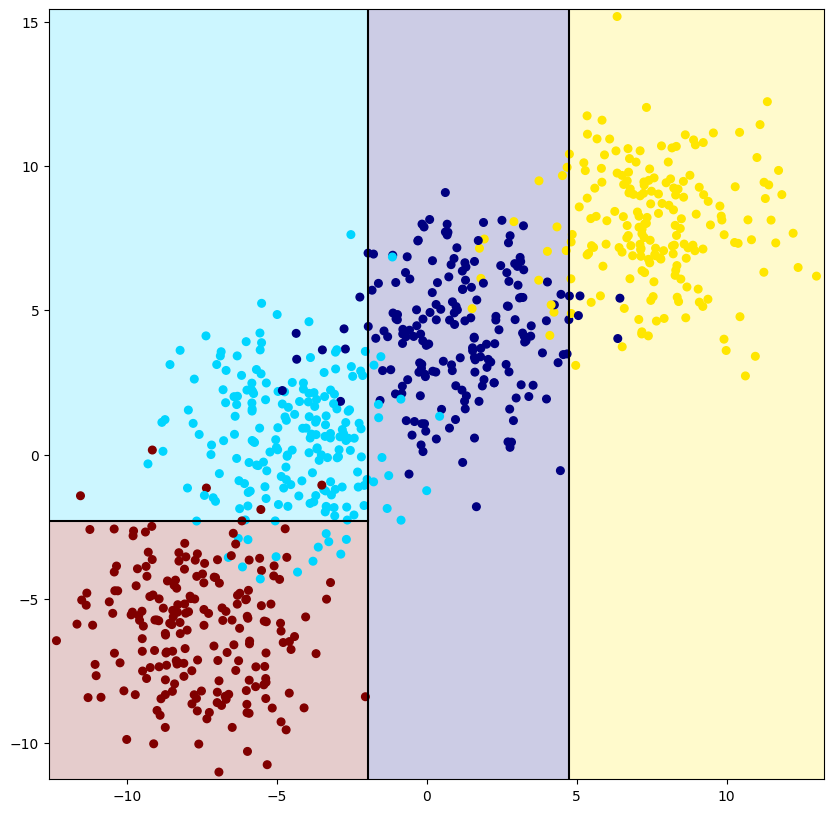

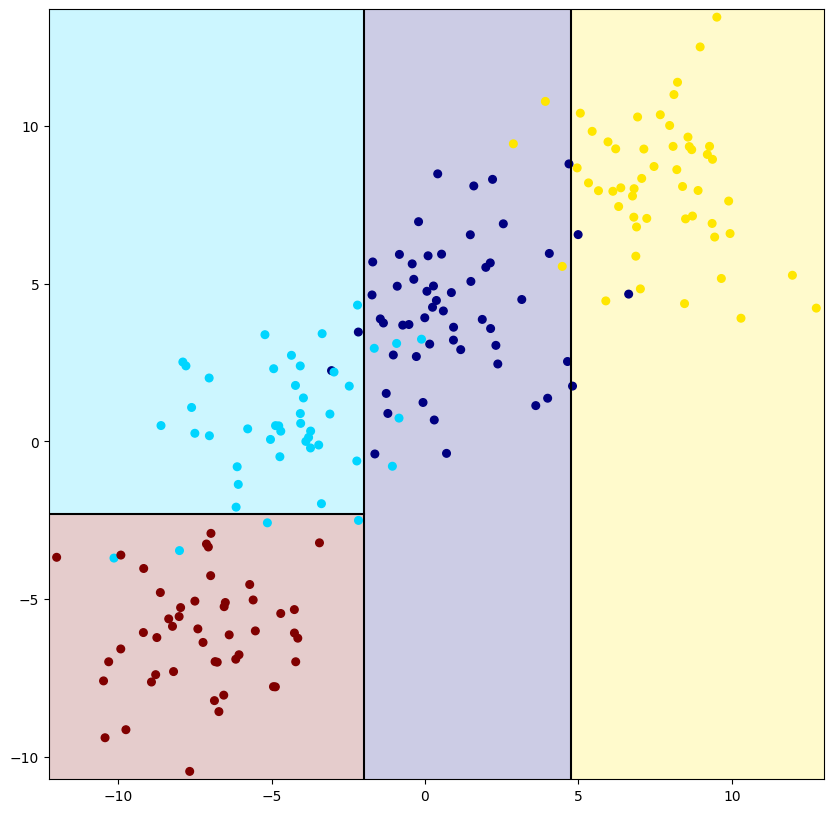

In [ ]:
# 訓練データに対する決定境界の描画
visualize_border(clf,x_train,y_train)
# テストデータに対する決定境界の描画
visualize_border(clf,x_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
#分類器の予測値を導出
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)
# 正解率の導出(テストデータに対するACCが重要)
print("ACC (train) : ", accuracy_score(y_train, pred_train))
print("ACC (test) : ", accuracy_score(y_test, pred_test))

ACC (train) :  0.9261576971214017
ACC (test) :  0.914572864321608


### 課題1
1. 上記で作成した架空データを利用して、決定木の最大深さを4及び6に変えた場合の決定木及び境界線（訓練データ及びテストデータそれぞれ）を描画せよ。
2. 決定木の訓練データ及びテストデータに対する正解率を導出せよ。
3. 例題(最大深さ2の場合)、課題1.1及び1.2の結果から決定木の深さと正解率の関係性について考察せよ。

**キーワード**：過学習

### 課題1解答

ACC (train) :  0.9461827284105131
ACC (test) :  0.914572864321608


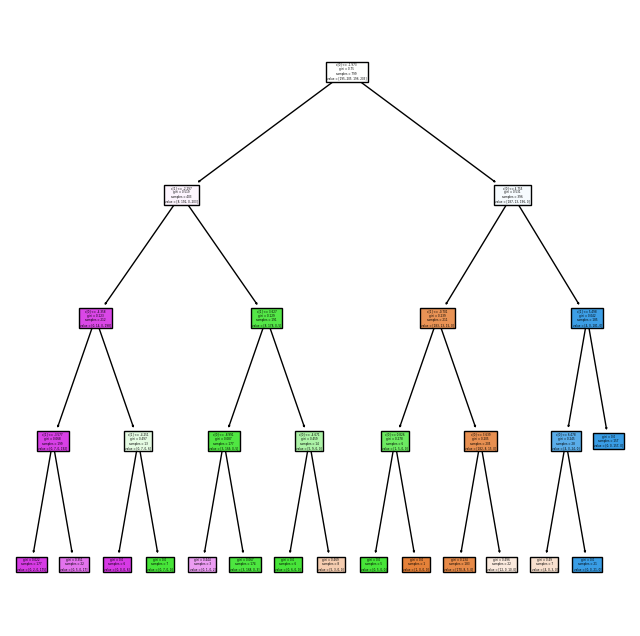

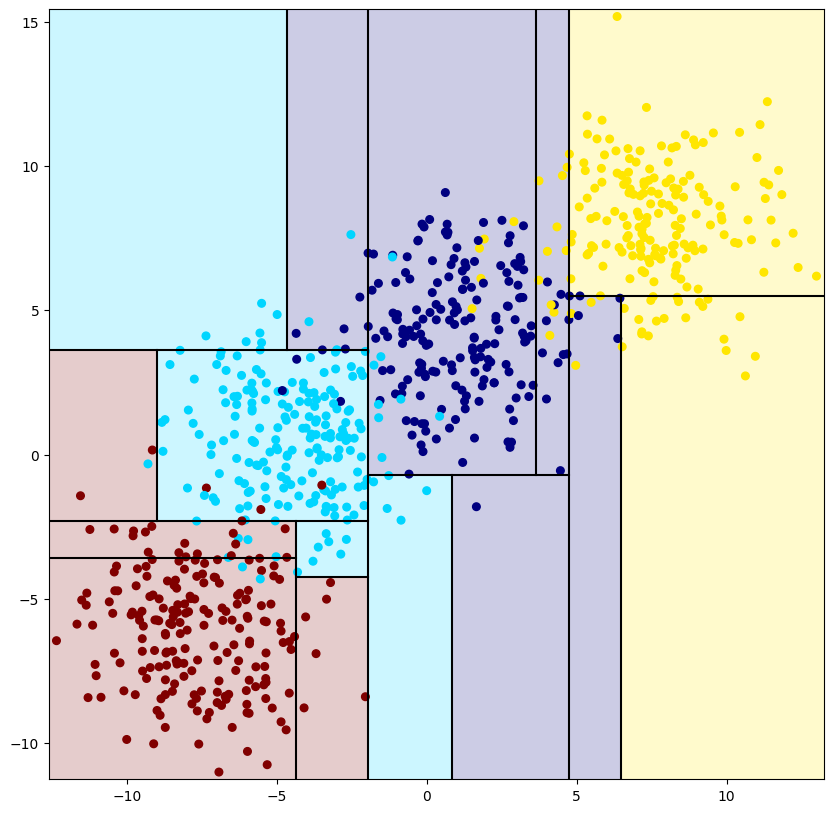

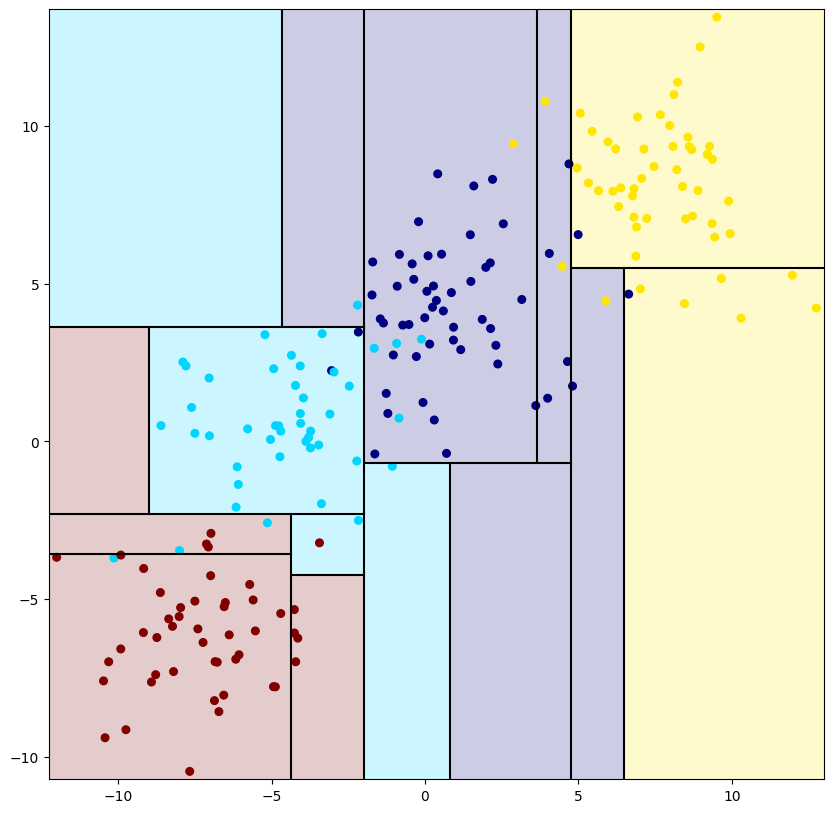

In [ ]:
# 深さ4の場合
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(x_train, y_train)
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)
print("ACC (train) : ", accuracy_score(y_train, pred_train))
print("ACC (test) : ", accuracy_score(y_test, pred_test))

plt.figure(figsize=(8, 8))
tree.plot_tree(clf, filled=True)
plt.show()
visualize_border(clf,x_train,y_train)
visualize_border(clf,x_test,y_test)

ACC (train) :  0.967459324155194
ACC (test) :  0.8994974874371859


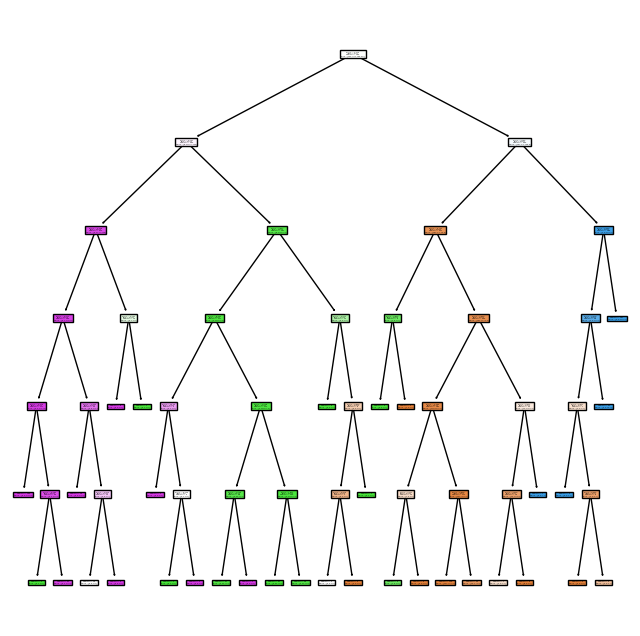

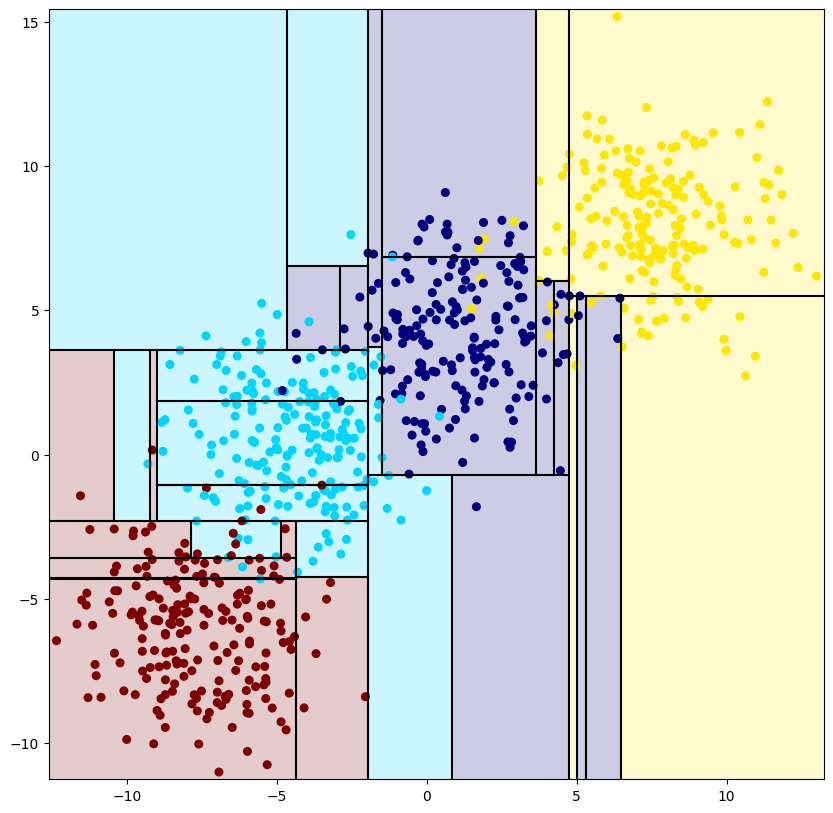

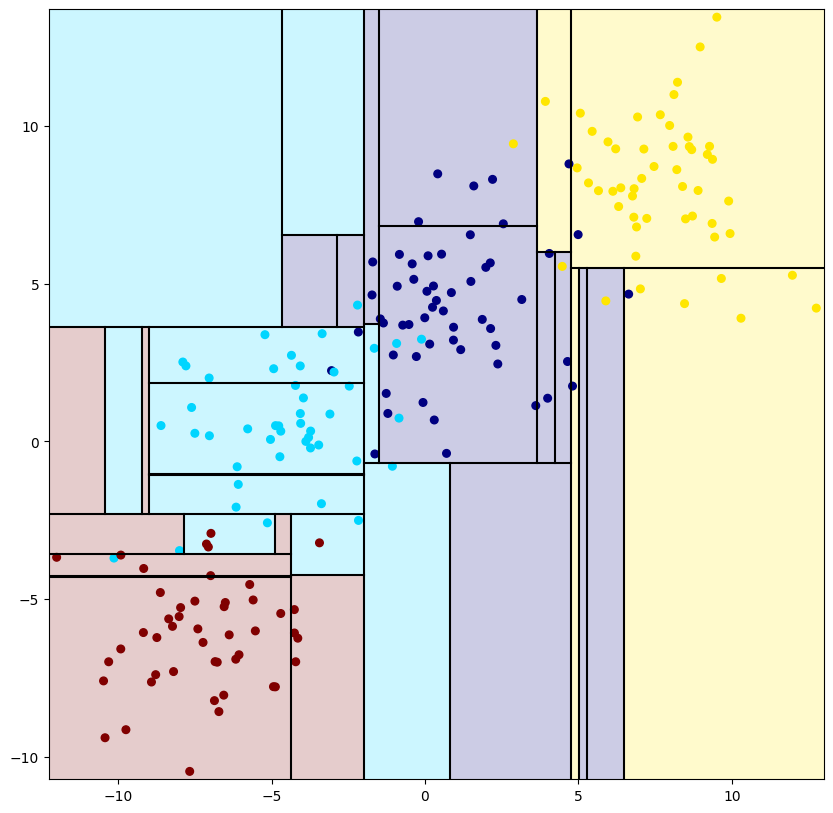

In [ ]:
# 深さ6の場合
clf = tree.DecisionTreeClassifier(max_depth=6, random_state=0)
clf.fit(x_train, y_train)
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)
print("ACC (train) : ", accuracy_score(y_train, pred_train))
print("ACC (test) : ", accuracy_score(y_test, pred_test))

plt.figure(figsize=(8, 8))
tree.plot_tree(clf, filled=True)
plt.show()
visualize_border(clf,x_train,y_train)
visualize_border(clf,x_test,y_test)

#ランダムフォレスト

ACC (train) :  0.9987484355444305
ACC (test) :  0.9095477386934674


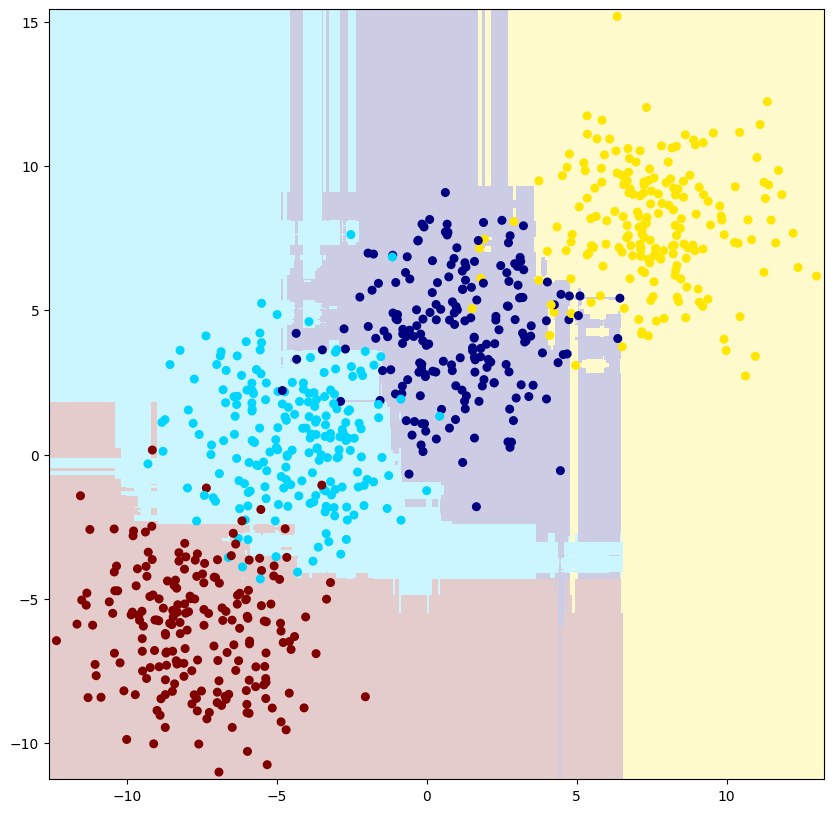

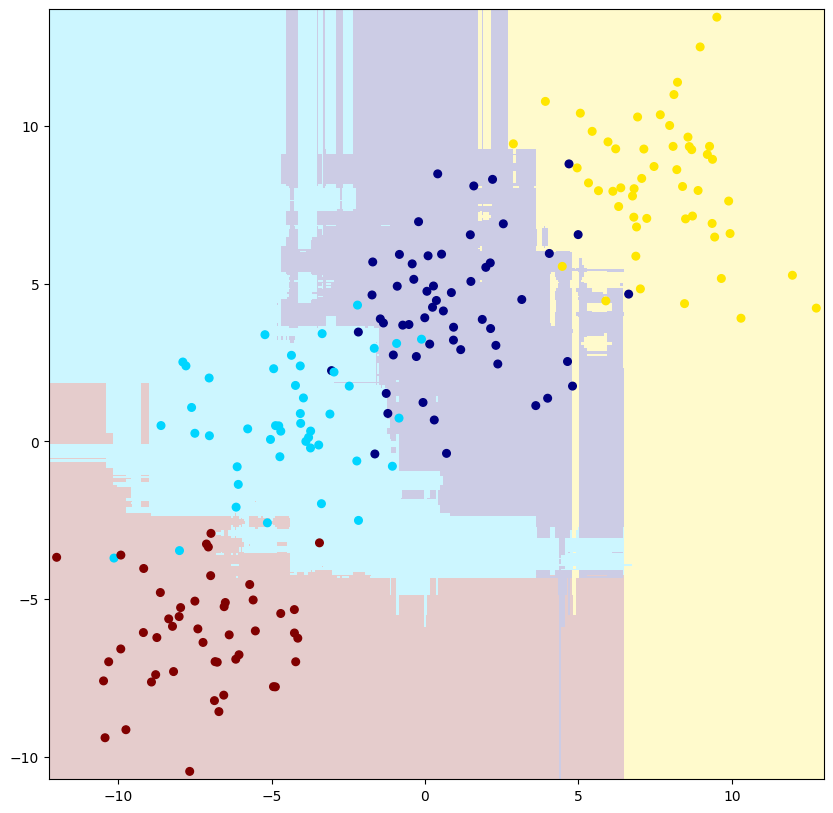

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators:作成する木の数。max_depth=Noneは制限無。
clf = RandomForestClassifier(n_estimators=50, max_depth=None, random_state=0)
clf.fit(x_train, y_train)

pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)
print("ACC (train) : ", accuracy_score(y_train, pred_train))
print("ACC (test) : ", accuracy_score(y_test, pred_test))

# 決定境界の描画
visualize_border(clf,x_train,y_train, dicision_tree=False)
visualize_border(clf,x_test,y_test, dicision_tree=False)

### 課題2
1. 上記で作成した架空データを利用して、ランダムフォレストのパラメータ（木の数、最大深さ）を変えて、テストデータに対する正解率を改善せよ。その際、決定境界（訓練データ及びテストデータそれぞれ）も描画せよ。
> *途中結果は保存しておくこと。
2. 課題1の内容も踏まえ、決定木とランダムフォレストの違いについて考察せよ。考察には課題2.1で得た結果も適宜利用すること。

### 任意課題1
1. 課題2.1において，テストデータに対するACCを0.924以上に改善せよ。


### 課題2解答(ACC:0.924以上となる例)

ACC (train) :  0.9799749687108886
ACC (test) :  0.9246231155778895


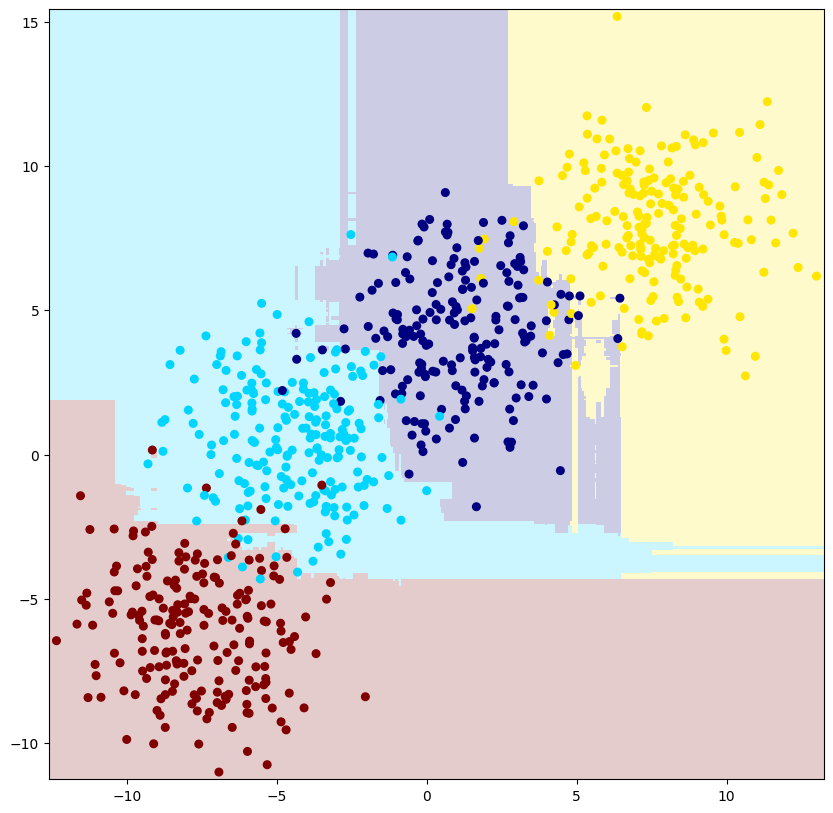

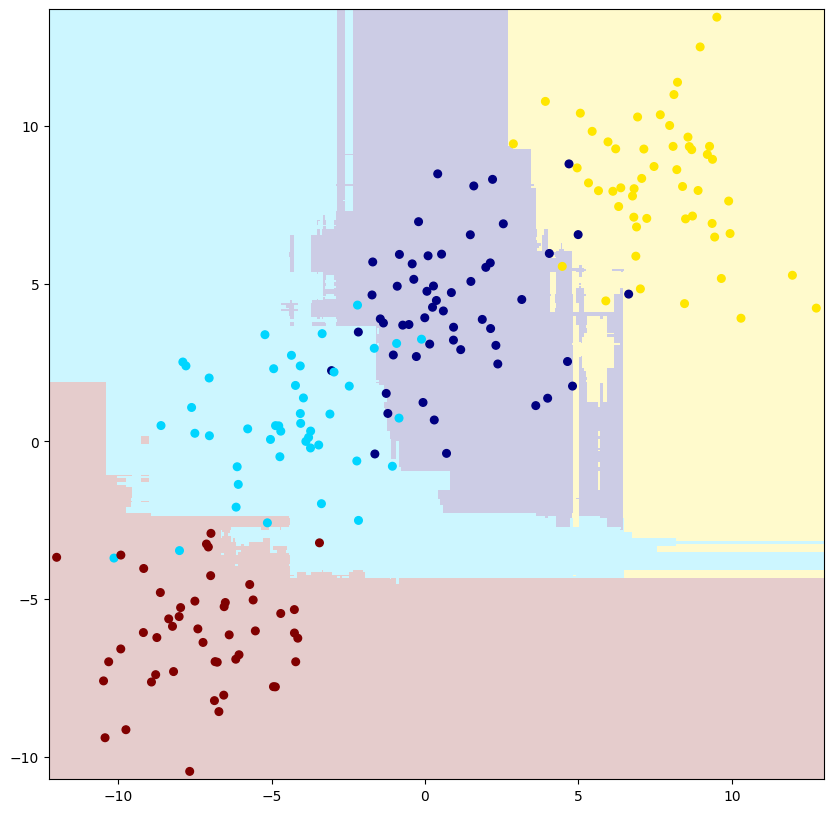

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=0)
clf.fit(x_train, y_train)

pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)
print("ACC (train) : ", accuracy_score(y_train, pred_train))
print("ACC (test) : ", accuracy_score(y_test, pred_test))

visualize_border(clf,x_train,y_train, dicision_tree=False)
visualize_border(clf,x_test,y_test, dicision_tree=False)

#XGBoost

ACC (train) :  1.0
ACC (test) :  0.8994974874371859


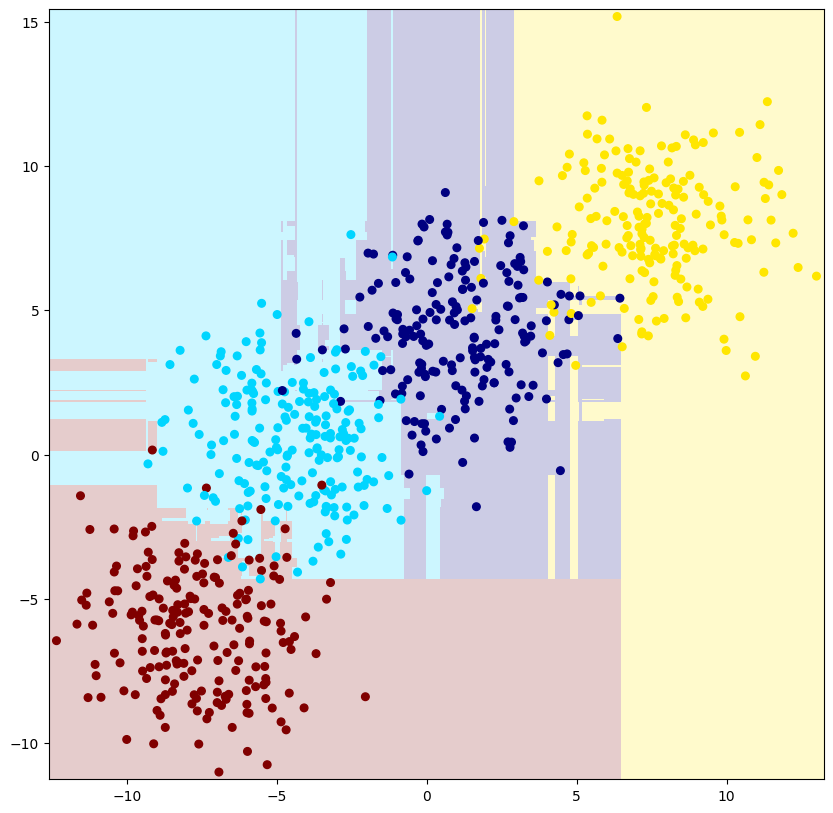

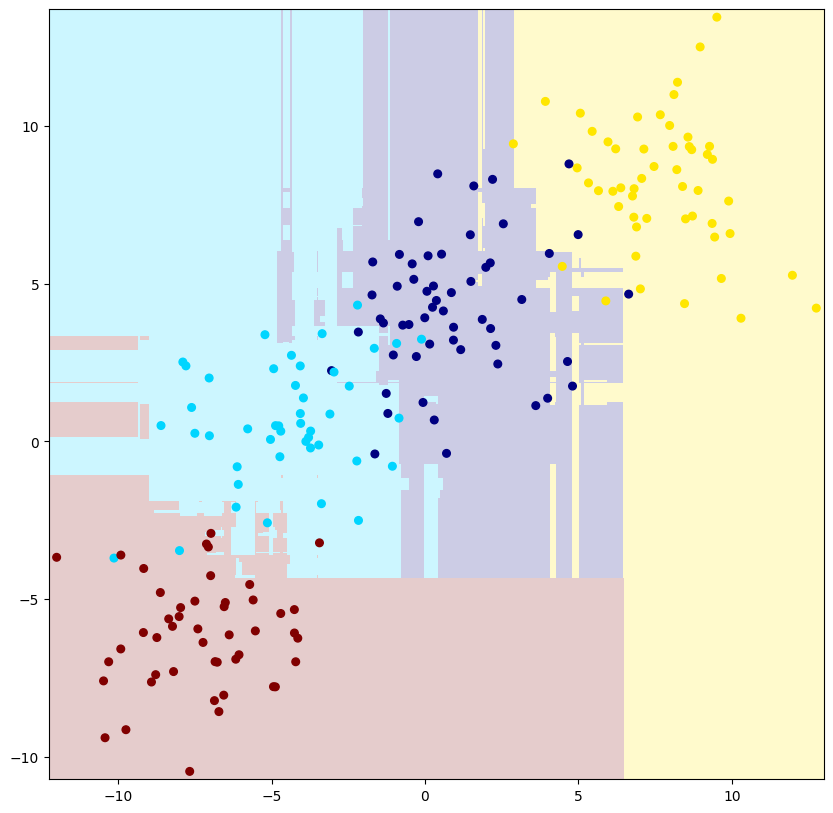

In [ ]:
import xgboost as xgb

# learning_rate: 過学習防止のための学習率パラメータ(大きいほど過学習寄り)
clf = xgb.XGBClassifier(n_estimators=100, max_depth=None, learning_rate=0.3, random_state=0)
clf.fit(x_train, y_train)

pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)
print("ACC (train) : ", accuracy_score(y_train, pred_train))
print("ACC (test) : ", accuracy_score(y_test, pred_test))

# 決定境界の描画
visualize_border(clf,x_train,y_train, dicision_tree=False)
visualize_border(clf,x_test,y_test, dicision_tree=False)

### 課題3
1. 上記で作成した架空データを利用して、XGboostのパラメータ（木の数、最大深さ、学習率）を変えて、テストデータに対する正解率を改善せよ。その際、決定境界（訓練データ及びテストデータそれぞれ）も描画せよ。
> *途中結果は保存しておくこと。

### 任意課題2
1. XGboostは課題3.1で変更したパラメータ以外にも数々のパラメータを持つ。それらパラメータについて調べ、追加し、それらパラメータを変えて、テストデータに対する正解率を改善せよ。



### 課題3解答例+任意課題2(reg_lambdaの追加)

ACC (train) :  0.9737171464330413
ACC (test) :  0.9195979899497487


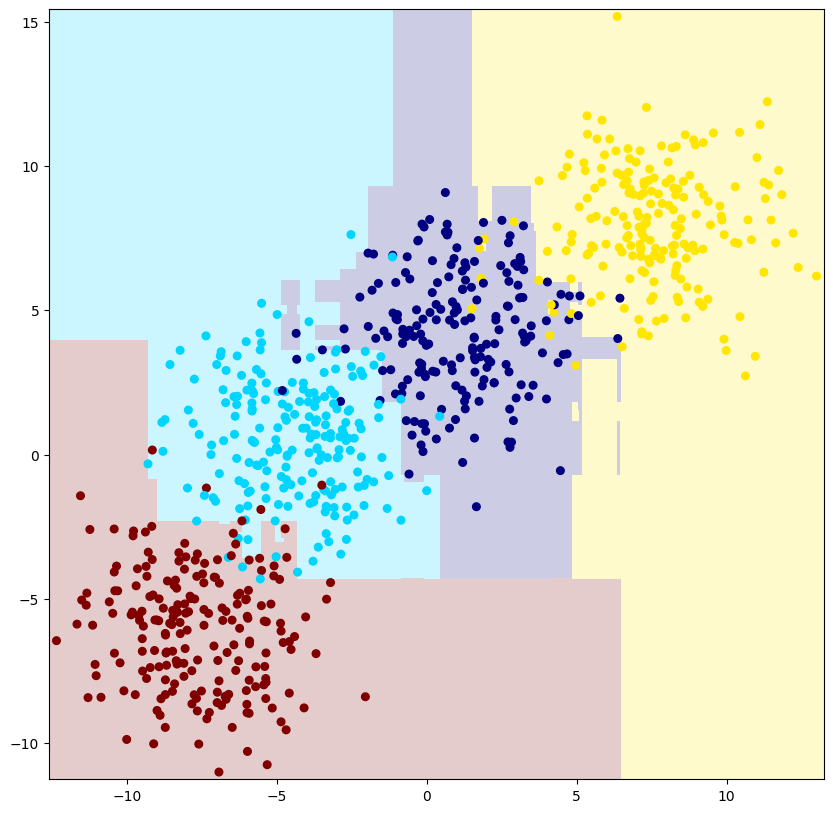

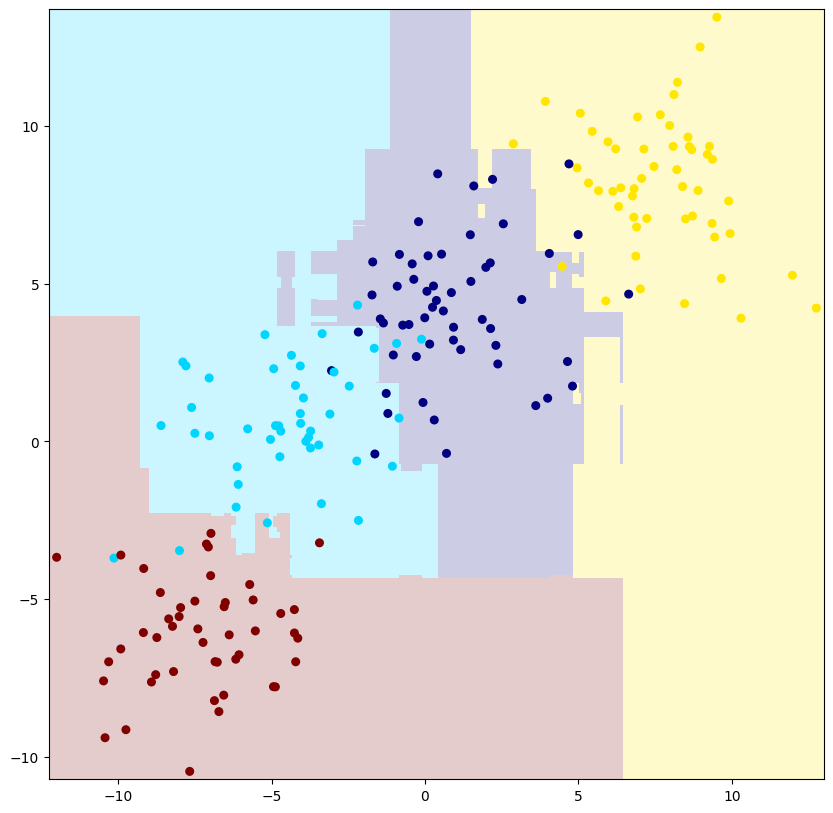

In [ ]:
clf = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, reg_lambda=10, random_state=0)
clf.fit(x_train, y_train)

pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)
print("ACC (train) : ", accuracy_score(y_train, pred_train))
print("ACC (test) : ", accuracy_score(y_test, pred_test))

# 決定境界の描画
visualize_border(clf,x_train,y_train, dicision_tree=False)
visualize_border(clf,x_test,y_test, dicision_tree=False)

# 回帰問題

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# ノイズ付き合成sin派を生成する関数
def sin_model(x, n=1):
    np.random.seed(seed=0)
    noise = n * 0.2 * np.random.randn(len(x))
    return np.sin(3 * x) + np.sin(0.3 * x) + noise

In [ ]:
# 訓練データを100組作成(xは任意のx座標、yはxに対するノイズ付き合成sin派の出力)
x_train = 10 * np.random.rand(100)
y_train = sin_model(x_train)

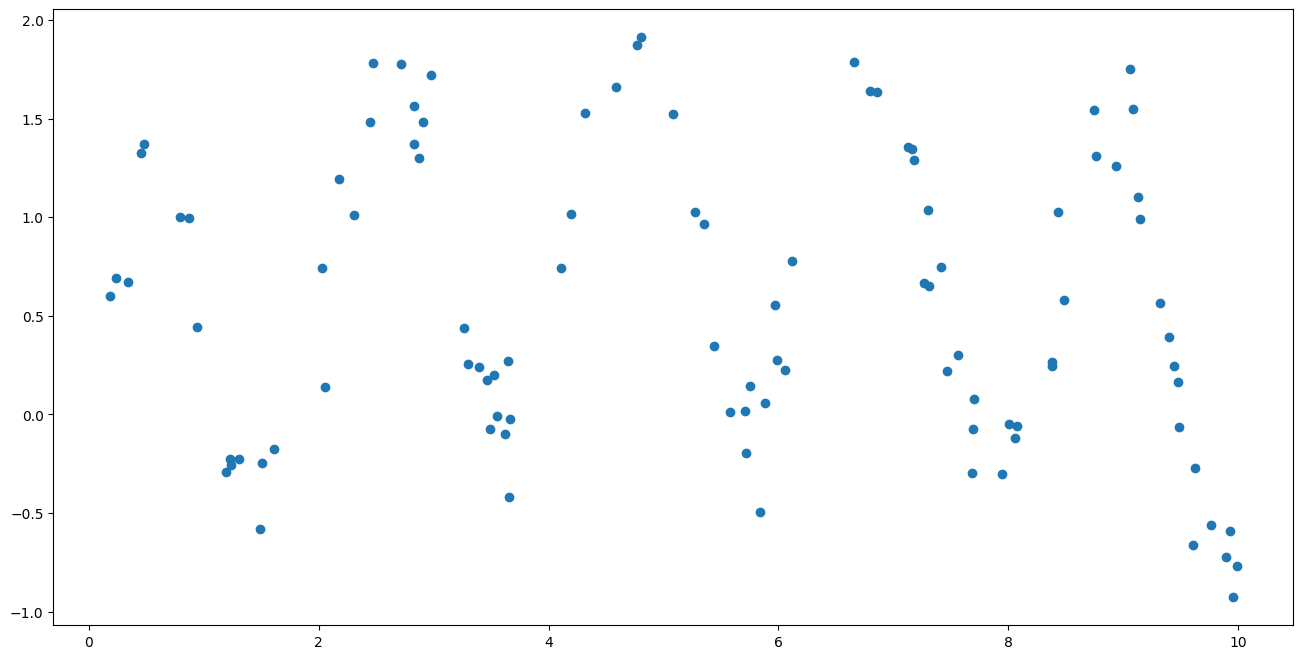

In [ ]:
# 訓練データをプロット
plt.figure(figsize=(16,8))
plt.scatter(x_train, y_train)

In [ ]:
# ランダムフォレストによる回帰モデルを作成
rfr = RandomForestRegressor(n_estimators=100, max_depth=None)

#トレーニング
rfr.fit(x_train[:, None], y_train)

RandomForestRegressor()

In [ ]:
#テストデータとして、1000等分（0<=x<=10)したxを用意
x = np.linspace(0, 10, 1000)
#xに対する回帰モデルによる予測値を計算
y_pred = rfr.predict(x[:, None])

In [ ]:
#ノイズの無い合成sin派（回帰によって求めたい真の目標）
y_true = sin_model(x, 0)

RMSE :  0.1865186754776062


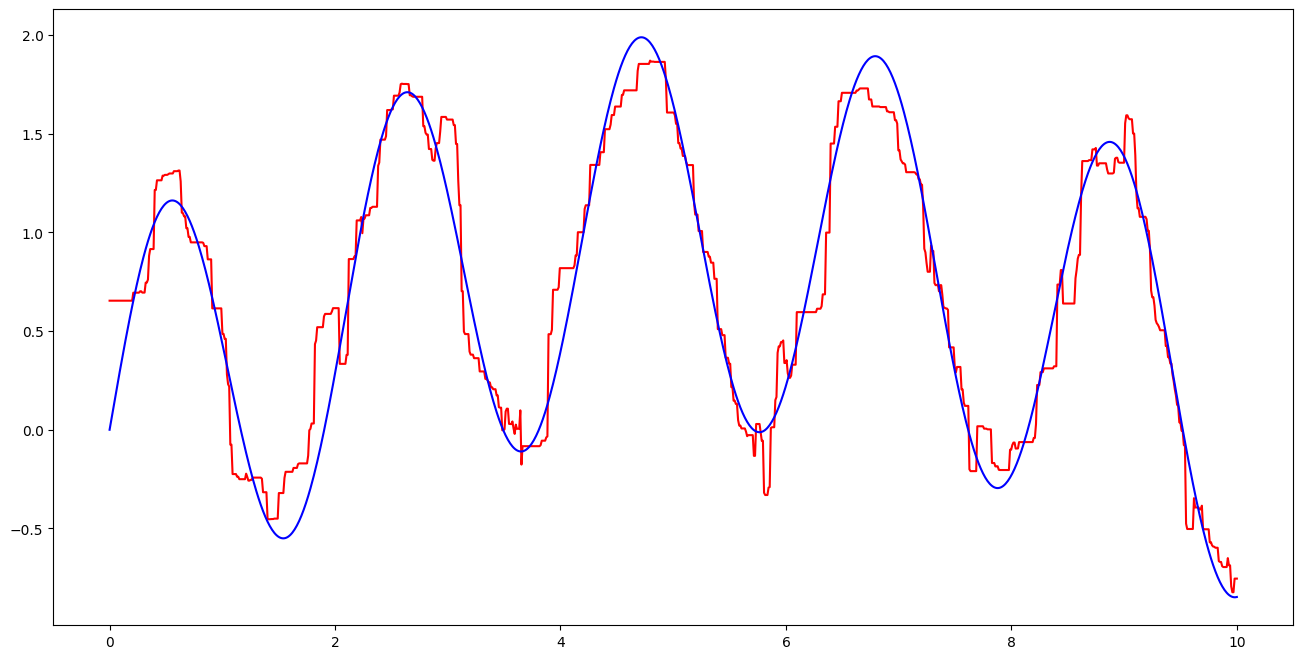

In [ ]:
from sklearn.metrics import mean_squared_error

#グラフを作成
plt.figure(figsize=(16,8))

# ランダムフォレスト回帰モデルによって得られた予測値
plt.plot(x, y_pred, '-r');
plt.plot(x, y_true, '-b');

# 評価指標：RMSE(Root Mean Squared Error)
print("RMSE : ", np.sqrt(mean_squared_error(y_true, y_pred)))

### 課題4
1. 上記の合成sin派の予測問題において、ランダムフォレストのパラメータ（木の数、最大深さ）や訓練データの数を変えて、回帰モデルの精度（RSME）を改善せよ。
2. 得られた結果から、回帰モデルの精度向上においてどのような点が重要だと思われるか考察せよ。

### 課題4解答例(訓練データの総数の増加）

回帰問題における精度向上において、パラメータチューニングも同様に重要ではあるが、訓練データの総数は非常に重要であると考えられる。訓練データを増やすほど学習時間は伸びる反面、モデルの汎化性能は向上する（=精度向上）。ただし、実問題等では、訓練データの準備にはコストがかかるため、訓練データの準備コストとモデルの汎化性能の兼ね合いによって訓練データの総数は決定されるべきである。その上で、更なる精度向上手段としてパラメータチューニングが重要となってくる。

RMSE :  0.09505726113380181


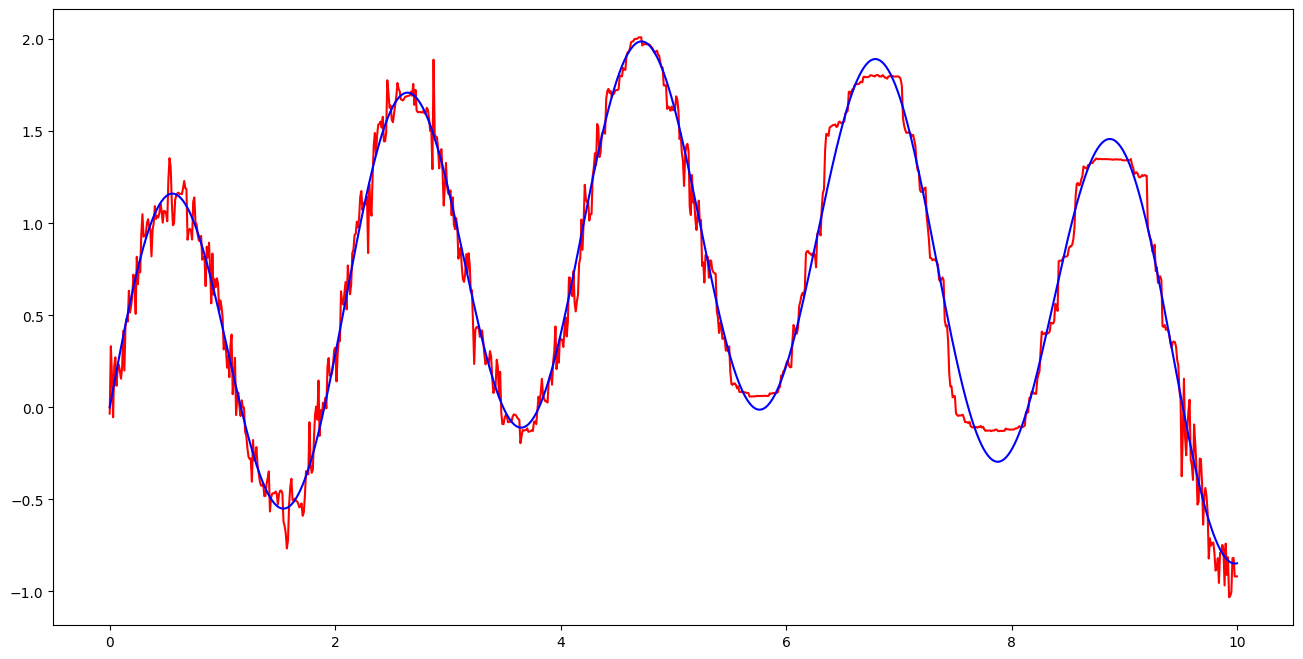

In [ ]:
# 訓練データ 100→2000組(増やせば増やすほど)
x_train = 10 * np.random.rand(2000)
y_train = sin_model(x_train)
# n_estimators 100→200 max_depth None→10
rfr = RandomForestRegressor(n_estimators=200, max_depth=10)
rfr.fit(x_train[:, None], y_train)

y_pred = rfr.predict(x[:, None])

plt.figure(figsize=(16,8))
plt.plot(x, y_pred, '-r');
plt.plot(x, y_true, '-b');

# RMSE(評価指標)
print("RMSE : ", np.sqrt(mean_squared_error(y_true, y_pred)))